In [1]:
import pandas as pd
import numpy as np
import pymongo
import matplotlib.pyplot as plt
from bson.objectid import ObjectId
import temas
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [34]:
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,     # use inline math for ticks
    "pgf.rcfonts": False    # don't setup fonts from rc parameters
})

In [2]:
temas.temas_dic["politítica"] = temas.temas_dic["politica"]
temas.temas_dic["infraestuctura vial y transportes"] = temas.temas_dic["infraestructura vial y transportes"]
temas.temas_dic["infraestructura vial y transprotes"] = temas.temas_dic["infraestructura vial y transportes"]

temas.temase_dics[4]["futbol"] = temas.temase_dics[4]["fútbol"]
temas.temase_dics[9]["educacion"] = temas.temase_dics[9]["educación"]
temas.temase_dics[9]["religion"] = temas.temase_dics[9]["religión"]
temas.temase_dics[5]["tecnologia"] = temas.temase_dics[5]["tecnología"]
temas.temase_dics[2]["television"] = temas.temase_dics[2]["televisión"]
temas.temase_dics[6]["eeuu"] = temas.temase_dics[6]["estados unidos"]
temas.temase_dics[2]["farándula"] = temas.temase_dics[2]["farandula"]
temas.temase_dics[0]["crímenes"] = temas.temase_dics[0]["crimenes"]
temas.temase_dics[0]["estafas y/o fraudes"] = temas.temase_dics[0]["estafa y/o fraude"]
temas.temase_dics[9]["personas con discapacidad"] = temas.temase_dics[9]["salud"]
temas.temase_dics[3]["funcionarios públicos"] = temas.temase_dics[3]["funcionarios publicos"]
temas.temase_dics[4]["atletismo o natación"] = temas.temase_dics[4]["atletismo"]
temas.temase_dics[3]["instituciones autónomas"] = temas.temase_dics[3]["instituciones publicas y autonomas"]
temas.temase_dics[7]["condolencias (fallecimiento)"] = temas.temase_dics[7]["condolencias"]
temas.temase_dics[9]["servicios"] = temas.temase_dics[9]["servicios públicos"]
temas.temase_dics[8]["pobreza (desigualdad)"] = temas.temase_dics[8]["pobreza"]
temas.temase_dics[5]["sostenibilidad"] = temas.temase_dics[5]["sotenibilidad"]
temas.temase_dics[7]["loteria"] = temas.temase_dics[7]["lotería"]
temas.temase_dics[0]["intervención polticial"] = temas.temase_dics[0]["intervención policial"]
temas.temase_dics[1]["tramsportes"] = temas.temase_dics[1]["transporte"]
temas.temase_dics[0]["asesinatos"] = temas.temase_dics[0]["asesinato"]
temas.temase_dics[1]["transportes"] = temas.temase_dics[1]["tramsportes"]
temas.temase_dics[9]["migraciones"] = temas.temase_dics[9]["migración"]
temas.temase_dics[0]["asesinatos"] = temas.temase_dics[0]["asesinato"]
temas.temase_dics[4]["olímpiadas"] = temas.temase_dics[4]["olimpiadas"]
temas.temase_dics[3]["asamble legislativa"] = temas.temase_dics[3]["asamblea legislativa"]
temas.temase_dics[3]["medición de opinión pública"] = temas.temase_dics[3]["medición opinión pública"]
temas.temase_dics[3]["ciudadanía"] = temas.temase_dics[3]["ciudadania"]
temas.temase_dics[0]["suicidio"] = temas.temase_dics[0]["suicidios"]
temas.temase_dics[6]["esfados unidos"] = temas.temase_dics[6]["estados unidos"]

In [3]:
temas.TEMASG

['sucesos',
 'infraestructura y transportes',
 'entretenimiento',
 'política',
 'deportes',
 'ciencia y ambiente',
 'asuntos internacionales',
 'otros',
 'economía',
 'asuntos sociales']

In [4]:
topic_translations = {
    "sucesos": "Domestic",
    "infraestructura y transportes": "Infrastructure",
    "entretenimiento": "Entertainment",
    "política": "Politics",
    "deportes": "Sports",
    "ciencia y ambiente": "Science and Environment",
    "asuntos internacionales": "International Affairs",
    "otros": "Other",
    "economía": "Economics",
    "asuntos sociales": "Social Issues"
}

In [5]:
def getStats(df):
    l = [
        {
            "Type": "Total",
            "Correct": sum((df["Predicted Topic"] == df["Corrected Topic"]) & (df["Predicted Subtopic"] == df["Corrected Subtopic"])),
            "Total": len(df),
            "Rate": sum((df["Predicted Topic"] == df["Corrected Topic"]) & (df["Predicted Subtopic"] == df["Corrected Subtopic"]))/len(df)
        },
        {
            "Type": "General",
            "Correct": sum(df["Predicted Topic"] == df["Corrected Topic"]),
            "Total": len(df),
            "Rate": sum(df["Predicted Topic"] == df["Corrected Topic"])/len(df)
        }
    ]

    for i in range(10):
        currcod = df[df["Corrected Topic"] == i]
        l.append({
            "Type": topic_translations[temas.TEMASG[i]],
            "Correct": sum(currcod["Predicted Subtopic"] == currcod["Corrected Subtopic"]),
            "Total": len(currcod),
            "Rate": sum(currcod["Predicted Subtopic"] == currcod["Corrected Subtopic"])/len(currcod)
        })

    return pd.DataFrame(l)[["Type", "Correct", "Total", "Rate"]]

In [6]:

def tema_a_num(tema):
    try:
        return temas.temas_dic[tema.strip().lower()]
    except:
        print("Tema erróneo: %s" % (tema,))
        return None

def temae_a_num(tema, i):
    try:
        return temas.temase_dics[i][tema.strip().lower()]
    except:
        # print("Tema erróneo: %s, número: %d" % (tema, i))
        return -1

In [7]:
client = pymongo.MongoClient()
db = client["mediaNet"]
collection = db["posts"]

# Primera Codificación

In [8]:
cod = pd.read_excel("experimento/Experimento_Codif_01.xlsx")

In [9]:
cod.head()

,Unnamed: 0,id,Texto en FB,Link,Tema General,Tema Específico,Corrección General,Corrección Específica,Unnamed: 8
0,0,5c241a3926ad31868586c210,Merma en las lluvias hace que nivel del agua d...,https://trib.al/OJeExbg,ciencia y ambiente,ambiente,NaN,NaN,NaN
1,1,5c24a6f79e07a73612738226,Sern atendidos los fines de semana y en consul...,https://www.crhoy.com/nacionales/adelantaran-c...,política,huelga,asuntos sociales,salud,NaN
2,2,5c24ad589e07a736127ccc4e,Mandatario de Estados Unidos contact va telefn...,https://trib.al/HGSNxoZ,política,electorales,asuntos internacionales,EEUU,NaN
3,3,5bbe40665b49ed04284b9252,El accidente se dio esta madrugada,https://www.crhoy.com/nacionales/accidente-mul...,sucesos,accidente,NaN,NaN,NaN
4,4,5c24a4e79e07a7361270a607,Torre ha logrado enderezarse gracias al trabaj...,https://www.crhoy.com/mundo/celebre-torre-de-p...,asuntos sociales,salud,otros,curiosidades,NaN


In [10]:
lod = []
for id in cod["id"]:
    doc = collection.find_one({"_id": ObjectId(id)})
    ac = doc["autoclassification"]
    lod.append({"id": id, "gp": ac["general_proba"][ac["general_prediction"]], "sp": ac["specific_proba"][ac["specific_prediction"]]})

tbl = pd.DataFrame(lod)
tbl.head()

,gp,id,sp
0,0.981696,5c241a3926ad31868586c210,0.444283
1,0.323443,5c24a6f79e07a73612738226,0.699020
2,0.724155,5c24ad589e07a736127ccc4e,0.399651
3,0.997149,5bbe40665b49ed04284b9252,0.775587
4,0.088606,5c24a4e79e07a7361270a607,0.316029


In [11]:
cod2 = pd.merge(cod, tbl, on="id")[["Tema General", "Tema Específico", "Corrección General", "Corrección Específica", "gp", "sp"]]
cod2.head()

,Tema General,Tema Específico,Corrección General,Corrección Específica,gp,sp
0,ciencia y ambiente,ambiente,NaN,NaN,0.981696,0.444283
1,política,huelga,asuntos sociales,salud,0.323443,0.699020
2,política,electorales,asuntos internacionales,EEUU,0.724155,0.399651
3,sucesos,accidente,NaN,NaN,0.997149,0.775587
4,asuntos sociales,salud,otros,curiosidades,0.088606,0.316029


In [12]:
cod2["Predicted Topic"] = cod2["Tema General"].apply(tema_a_num)
temaen = []
for index, row in cod2.iterrows():
    temaen.append(temae_a_num(row["Tema Específico"], row["Predicted Topic"]))
cod2["Predicted Subtopic"] = temaen
cod2["Corrección General"] = cod2["Corrección General"].fillna(cod2["Tema General"])
cod2["Corrección Específica"] = cod2["Corrección Específica"].fillna(cod2["Tema Específico"])
cod2["Corrected Topic"] = cod2["Corrección General"].apply(tema_a_num)
temaen = []
for index, row in cod2.iterrows():
    temaen.append(temae_a_num(row["Corrección Específica"], row["Corrected Topic"]))
cod2["Corrected Subtopic"] = temaen
cod3 = cod2[cod2["Corrected Subtopic"] >= 0][["Predicted Topic", "Corrected Topic", "Predicted Subtopic", "Corrected Subtopic", "gp", "sp"]]
print("\t", len(cod3))
cod3.head()

	 380


,Predicted Topic,Corrected Topic,Predicted Subtopic,Corrected Subtopic,gp,sp
0,5,5,0,0,0.981696,0.444283
1,3,9,5,13,0.323443,0.699020
2,3,6,6,1,0.724155,0.399651
3,0,0,0,0,0.997149,0.775587
4,9,7,13,1,0.088606,0.316029


In [13]:
getStats(cod3)

,Type,Correct,Total,Rate
0,Total,230,380,0.605263
1,General,285,380,0.750000
2,Domestic,59,86,0.686047
3,Infrastructure,6,11,0.545455
4,Entertainment,23,32,0.718750
5,Politics,48,71,0.676056
6,Sports,60,67,0.895522
7,Science and Environment,7,18,0.388889
8,International Affairs,3,13,0.230769
9,Other,9,25,0.360000


In [14]:
pdf = cod3.copy()
pdf["Correct"] = pdf["Predicted Topic"] == pdf["Corrected Topic"]
pdf.head()

,Predicted Topic,Corrected Topic,Predicted Subtopic,Corrected Subtopic,gp,sp,Correct
0,5,5,0,0,0.981696,0.444283,True
1,3,9,5,13,0.323443,0.699020,False
2,3,6,6,1,0.724155,0.399651,False
3,0,0,0,0,0.997149,0.775587,True
4,9,7,13,1,0.088606,0.316029,False


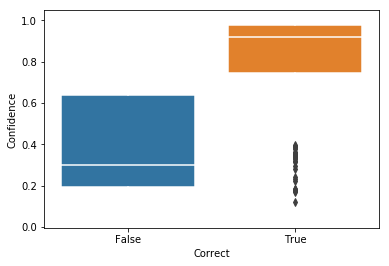

In [15]:
fig, ax = plt.subplots()
sns.boxplot(x='Correct', y='gp', data=pdf)
for line in ax.lines:
    line.set_color("w")
for artist in ax.artists:
    artist.set_edgecolor("w")
plt.ylabel("Confidence")
plt.show()

In [16]:
cod4 = cod3[(cod3["gp"] >= 0.7)]
cod4.head()

,Predicted Topic,Corrected Topic,Predicted Subtopic,Corrected Subtopic,gp,sp
0,5,5,0,0,0.981696,0.444283
2,3,6,6,1,0.724155,0.399651
3,0,0,0,0,0.997149,0.775587
5,4,4,4,4,0.998591,0.978076
6,4,4,4,4,0.822912,0.979689


In [17]:
getStats(cod4)

,Type,Correct,Total,Rate
0,Total,191,243,0.786008
1,General,222,243,0.913580
2,Domestic,49,62,0.790323
3,Infrastructure,4,4,1.000000
4,Entertainment,13,15,0.866667
5,Politics,41,54,0.759259
6,Sports,58,60,0.966667
7,Science and Environment,7,10,0.700000
8,International Affairs,3,6,0.500000
9,Other,5,8,0.625000


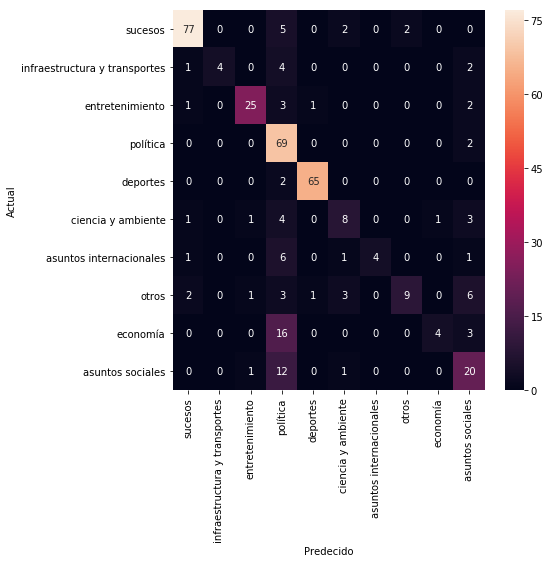

In [18]:
conf_mat = confusion_matrix(cod3["Corrected Topic"], cod3["Predicted Topic"])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=temas.TEMASG, yticklabels=temas.TEMASG)
plt.ylabel('Actual')
plt.xlabel('Predecido')
plt.show()

# Segunda Codificación

In [19]:
cod5 = pd.read_excel("experimento/Experimento_Codif_02.xlsx")
cod5.head()

,Unnamed: 0,id,Texto en FB,Link,Tema General,Tema Específico,Corrección General,Corrección Específica
0,1,5c241a3926ad31868586c210,Merma en las lluvias hace que nivel del agua d...,https://trib.al/OJeExbg,ciencia y ambiente,ambiente,NaN,NaN
1,2,5c24a6f79e07a73612738226,Sern atendidos los fines de semana y en consul...,https://www.crhoy.com/nacionales/adelantaran-c...,política,huelga,Asuntos sociales,Salud
2,3,5c24ad589e07a736127ccc4e,Mandatario de Estados Unidos contact va telefn...,https://trib.al/HGSNxoZ,política,electorales,Asuntos internacionales,Estados Unidos
3,4,5bbe40665b49ed04284b9252,El accidente se dio esta madrugada,https://www.crhoy.com/nacionales/accidente-mul...,sucesos,accidente,NaN,NaN
4,5,5c24a4e79e07a7361270a607,Torre ha logrado enderezarse gracias al trabaj...,https://www.crhoy.com/mundo/celebre-torre-de-p...,asuntos sociales,salud,Otros,Curiosidades


In [20]:
lod = []
for id in cod5["id"]:
    doc = collection.find_one({"_id": ObjectId(id)})
    ac = doc["autoclassification"]
    lod.append({"id": id, "gp": ac["general_proba"][ac["general_prediction"]], "sp": ac["specific_proba"][ac["specific_prediction"]]})

tbl = pd.DataFrame(lod)
tbl.head()

,gp,id,sp
0,0.981696,5c241a3926ad31868586c210,0.444283
1,0.323443,5c24a6f79e07a73612738226,0.699020
2,0.724155,5c24ad589e07a736127ccc4e,0.399651
3,0.997149,5bbe40665b49ed04284b9252,0.775587
4,0.088606,5c24a4e79e07a7361270a607,0.316029


In [21]:
cod6 = pd.merge(cod5, tbl, on="id")[["Tema General", "Tema Específico", "Corrección General", "Corrección Específica", "gp", "sp"]]
cod6.head()

,Tema General,Tema Específico,Corrección General,Corrección Específica,gp,sp
0,ciencia y ambiente,ambiente,NaN,NaN,0.981696,0.444283
1,política,huelga,Asuntos sociales,Salud,0.323443,0.699020
2,política,electorales,Asuntos internacionales,Estados Unidos,0.724155,0.399651
3,sucesos,accidente,NaN,NaN,0.997149,0.775587
4,asuntos sociales,salud,Otros,Curiosidades,0.088606,0.316029


In [22]:
cod6["Predicted Topic"] = cod6["Tema General"].apply(tema_a_num)
temaen = []
for index, row in cod6.iterrows():
    temaen.append(temae_a_num(row["Tema Específico"], row["Predicted Topic"]))
cod6["Predicted Subtopic"] = temaen
cod6["Corrección General"] = cod6["Corrección General"].fillna(cod6["Tema General"])
cod6["Corrección Específica"] = cod6["Corrección Específica"].fillna(cod6["Tema Específico"])
cod6["Corrected Topic"] = cod6["Corrección General"].apply(tema_a_num)
temaen = []
for index, row in cod6.iterrows():
    temaen.append(temae_a_num(row["Corrección Específica"], row["Corrected Topic"]))
cod6["Corrected Subtopic"] = temaen
cod7 = cod6[cod6["Corrected Subtopic"] >= 0][["Predicted Topic", "Corrected Topic", "Predicted Subtopic", "Corrected Subtopic", "gp", "sp"]]
print("\t", len(cod7))
cod7.head()

	 384


,Predicted Topic,Corrected Topic,Predicted Subtopic,Corrected Subtopic,gp,sp
0,5,5,0,0,0.981696,0.444283
1,3,9,5,13,0.323443,0.699020
2,3,6,6,1,0.724155,0.399651
3,0,0,0,0,0.997149,0.775587
4,9,7,13,1,0.088606,0.316029


In [23]:
getStats(cod7)

,Type,Correct,Total,Rate
0,Total,209,384,0.544271
1,General,297,384,0.773438
2,Domestic,46,89,0.516854
3,Infrastructure,4,14,0.285714
4,Entertainment,17,33,0.515152
5,Politics,51,87,0.586207
6,Sports,57,63,0.904762
7,Science and Environment,6,15,0.400000
8,International Affairs,4,15,0.266667
9,Other,7,17,0.411765


In [24]:
pdf = cod7.copy()
pdf["Correct"] = pdf["Predicted Topic"] == pdf["Corrected Topic"]
pdf.head()

,Predicted Topic,Corrected Topic,Predicted Subtopic,Corrected Subtopic,gp,sp,Correct
0,5,5,0,0,0.981696,0.444283,True
1,3,9,5,13,0.323443,0.699020,False
2,3,6,6,1,0.724155,0.399651,False
3,0,0,0,0,0.997149,0.775587,True
4,9,7,13,1,0.088606,0.316029,False


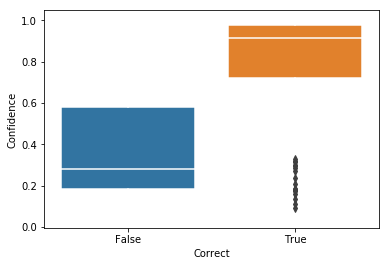

In [25]:
fig, ax = plt.subplots()
sns.boxplot(x='Correct', y='gp', data=pdf)
for line in ax.lines:
    line.set_color("w")
for artist in ax.artists:
    artist.set_edgecolor("w")
plt.ylabel("Confidence")
plt.show()

In [26]:
cod8 = cod7[(cod7["gp"] >= 0.7)]
cod8.head()

,Predicted Topic,Corrected Topic,Predicted Subtopic,Corrected Subtopic,gp,sp
0,5,5,0,0,0.981696,0.444283
2,3,6,6,1,0.724155,0.399651
3,0,0,0,0,0.997149,0.775587
5,4,4,4,4,0.998591,0.978076
6,4,7,4,1,0.822912,0.979689


In [27]:
getStats(cod8)

,Type,Correct,Total,Rate
0,Total,172,242,0.710744
1,General,225,242,0.929752
2,Domestic,38,62,0.612903
3,Infrastructure,4,6,0.666667
4,Entertainment,10,16,0.625000
5,Politics,40,61,0.655738
6,Sports,56,58,0.965517
7,Science and Environment,5,7,0.714286
8,International Affairs,3,6,0.500000
9,Other,3,6,0.500000


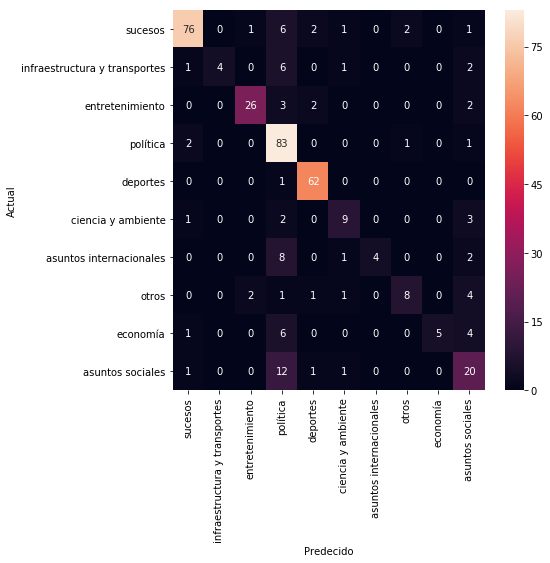

In [28]:
conf_mat = confusion_matrix(cod7["Corrected Topic"], cod7["Predicted Topic"])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=temas.TEMASG, yticklabels=temas.TEMASG)
plt.ylabel('Actual')
plt.xlabel('Predecido')
plt.show()

# Síntesis

In [29]:
getStats(pd.concat([cod3, cod7]))

,Type,Correct,Total,Rate
0,Total,439,764,0.574607
1,General,582,764,0.761780
2,Domestic,105,175,0.600000
3,Infrastructure,10,25,0.400000
4,Entertainment,40,65,0.615385
5,Politics,99,158,0.626582
6,Sports,117,130,0.900000
7,Science and Environment,13,33,0.393939
8,International Affairs,7,28,0.250000
9,Other,16,42,0.380952


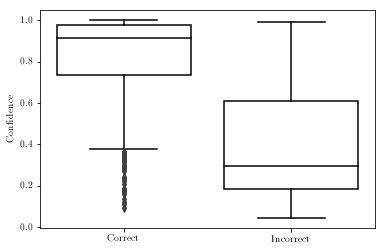

In [35]:
pdf = pd.concat([cod3, cod7]).copy()
pdf["Correct"] = (pdf["Predicted Topic"] == pdf["Corrected Topic"]).apply(lambda x: "Correct" if x else "Incorrect")

fig, ax = plt.subplots()
sns.boxplot(x='Correct', y='gp', data=pdf)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
plt.ylabel("Confidence")
plt.xlabel("")
plt.savefig('boxplot.pdf')
plt.savefig('boxplot.pgf')
plt.show()

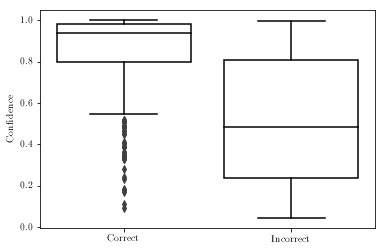

In [38]:
pdf = pd.concat([cod3, cod7]).copy()
pdf["Correct"] = ((pdf["Predicted Topic"] == pdf["Corrected Topic"]) & (pdf["Predicted Subtopic"] == pdf["Corrected Subtopic"])).apply(lambda x: "Correct" if x else "Incorrect")

fig, ax = plt.subplots()
sns.boxplot(x='Correct', y='gp', data=pdf)
# iterate over boxes
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')
plt.ylabel("Confidence")
plt.xlabel("")
plt.savefig('boxplot.pdf')
plt.savefig('boxplot.pgf')
plt.show()

In [31]:
getStats(pd.concat([cod4, cod8]))

,Type,Correct,Total,Rate
0,Total,363,485,0.748454
1,General,447,485,0.921649
2,Domestic,87,124,0.701613
3,Infrastructure,8,10,0.800000
4,Entertainment,23,31,0.741935
5,Politics,81,115,0.704348
6,Sports,114,118,0.966102
7,Science and Environment,12,17,0.705882
8,International Affairs,6,12,0.500000
9,Other,8,14,0.571429


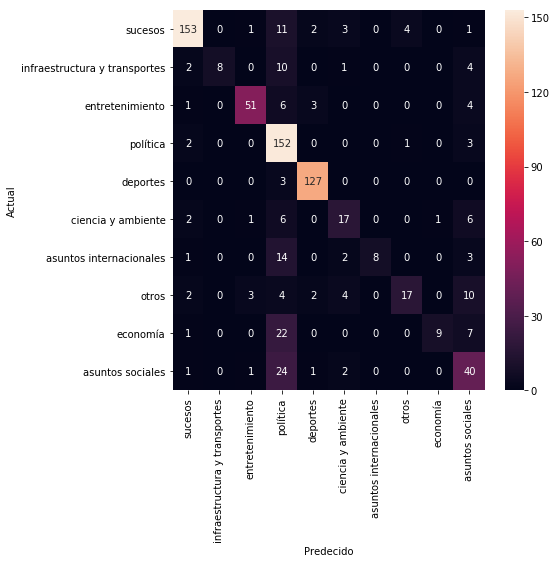

In [32]:
conf_mat = confusion_matrix(pd.concat([cod3, cod7])["Corrected Topic"], pd.concat([cod3, cod7])["Predicted Topic"])
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=temas.TEMASG, yticklabels=temas.TEMASG)
plt.ylabel('Actual')
plt.xlabel('Predecido')
plt.show()